# Trabajo práctico integrador

**Nombre**: Exequiel Gonzalez

## Primera Parte (Clase 1 y 2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [17]:
# Creamos una matriz de ejemplo
matriz = np.array([[2, 2, 4], [1, 0, 6], [7, 6, 9]])
print(matriz)

# Calculamos la norma l0
norma_l0 = np.sum(np.where(matriz != 0, 1, 0), axis=1)
print("Norma l0: ", norma_l0)

# Calculamos la norma l1
norma_l1 = np.sum(np.abs(matriz), axis=1)
print("Norma l1: ", norma_l1)

# Calculamos la norma l2
norma_l2 = np.sqrt(np.sum(matriz**2, axis=1))
print("Norma l2: ", norma_l2)

# Calculamos la norma l_infinito
norma_linf = np.max(np.abs(matriz), axis=1)
print("Norma l_infinito: ", norma_linf)

[[2 2 4]
 [1 0 6]
 [7 6 9]]
Norma l0:  [3 2 3]
Norma l1:  [ 8  7 22]
Norma l2:  [ 4.89897949  6.08276253 12.88409873]
Norma l_infinito:  [4 6 9]


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [18]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

# Cálculo de True Positive (TP)
TP = np.sum(np.logical_and(truth == 1, prediction == 1))

# Cálculo de True Negative (TN)
TN = np.sum(np.logical_and(truth == 0, prediction == 0))

# Cálculo de False Positive (FP)
FP = np.sum(np.logical_and(truth == 0, prediction == 1))

# Cálculo de False Negative (FN)
FN = np.sum(np.logical_and(truth == 1, prediction == 0))

# Cálculo de Precision
precision = TP / (TP + FP)

# Cálculo de Recall
recall = TP / (TP + FN)

# Cálculo de Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

True Positive: 3
True Negative: 1
False Positive: 3
False Negative: 3
Precision: 0.5
Recall: 0.5
Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

Estructura features del dataset: (7352, 561)
Estructura etiquetas del dataset: (7352,)
Número de componentes principales para explicar el 80% de la varianza: 25


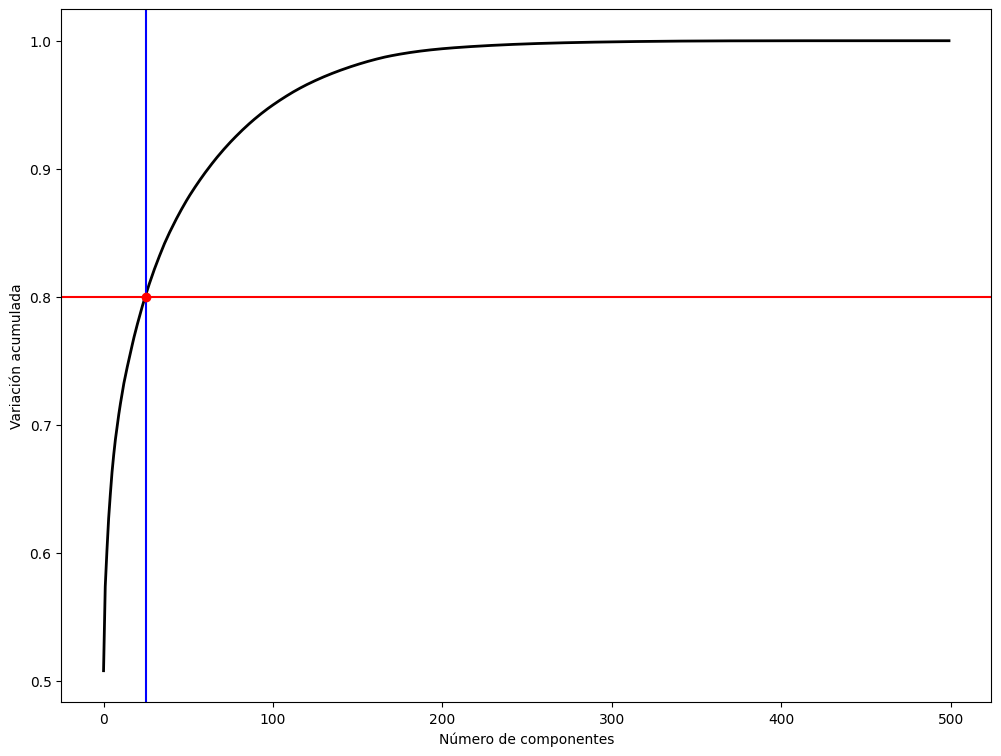

Text(0.5, 1.0, 'KMeans con k=6 y k=2')

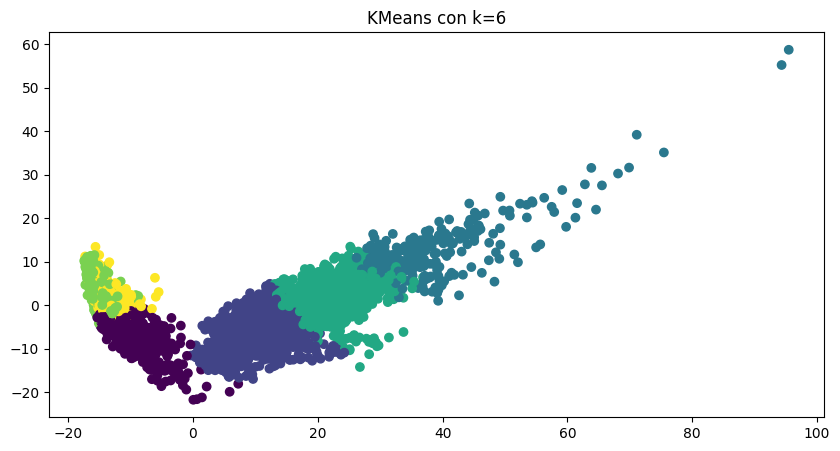

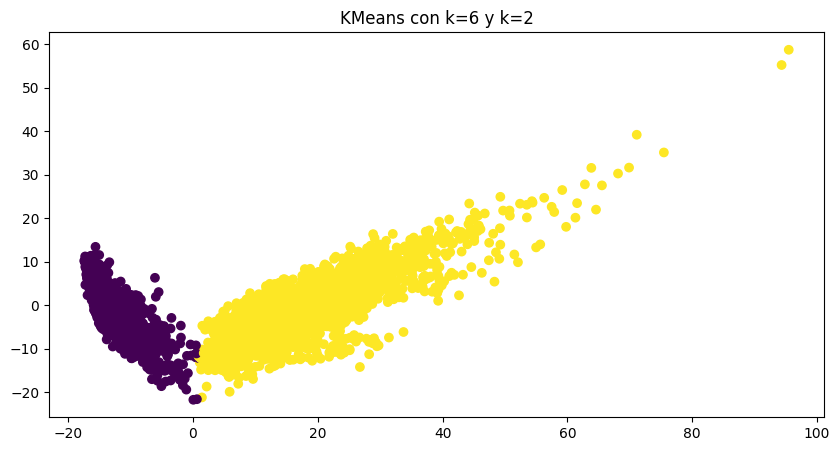

In [37]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 19


X_train = np.loadtxt("./data/HAR_Dataset/train/X_train.txt")
y_train = np.loadtxt("./data/HAR_Dataset/train/y_train.txt").astype(int)

##EDA MINIMO
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura etiquetas del dataset: {}".format(y_train.shape))

df = pd.DataFrame(data=X_train)
df.describe(include='all')


# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=500, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape


var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
n_components = np.argmax(cum_var_exp >= 0.8) 
print("Número de componentes principales para explicar el 80% de la varianza:", n_components)

# se Grafica la variación acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)


# se Grafican los segmentos y los puntos de interés
plt.axvline(n_components, c='b')
plt.axhline(0.8, c='r')
#se grafica el punto 25,0.8
plt.plot(n_components, 0.8, 'ro')


plt.xlabel('Número de componentes')
plt.ylabel('Variación acumulada')
plt.show()



# KMeans con k=6 
kmeans_6 = KMeans(n_clusters=6, random_state=RANDOM_STATE).fit(X_pca)

# KMeans con k=2 
kmeans_2 = KMeans(n_clusters=2, random_state=RANDOM_STATE).fit(X_pca)

# Graficar resultados para k=6 y k=10
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_6.labels_)
plt.title('KMeans con k=6')


# Graficar resultados para k=2
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_2.labels_)
plt.title('KMeans con k=6 y k=2')


## MNIST



(1797, 64)


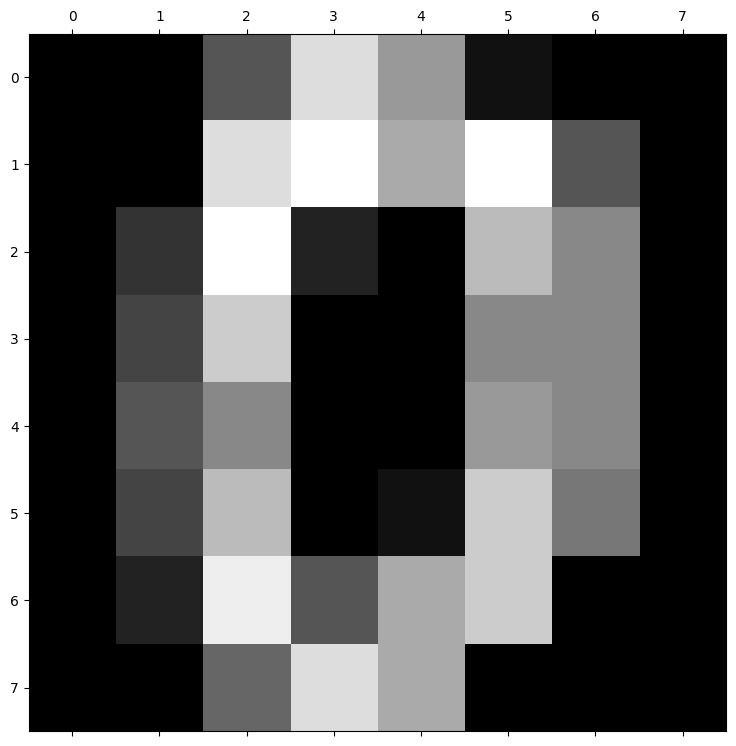

Número de componentes principales para explicar el 80% de la varianza: 21


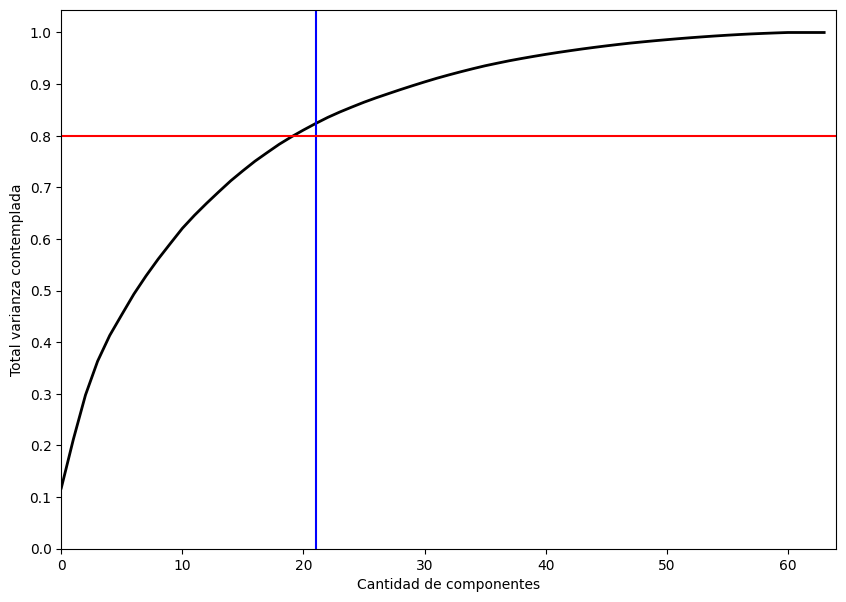

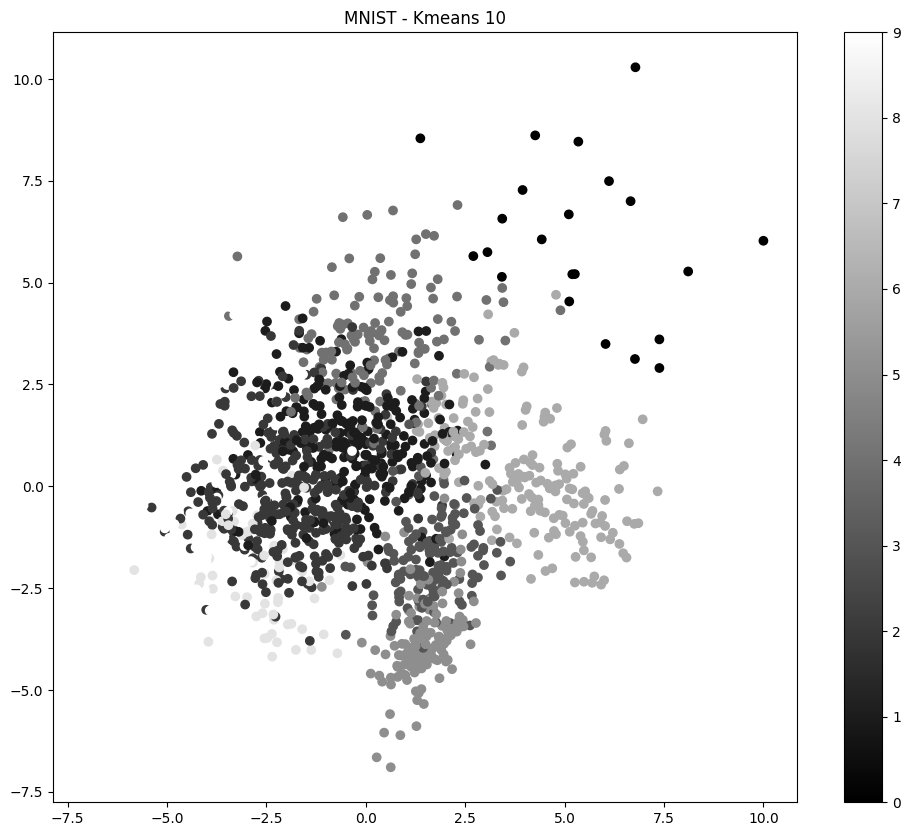

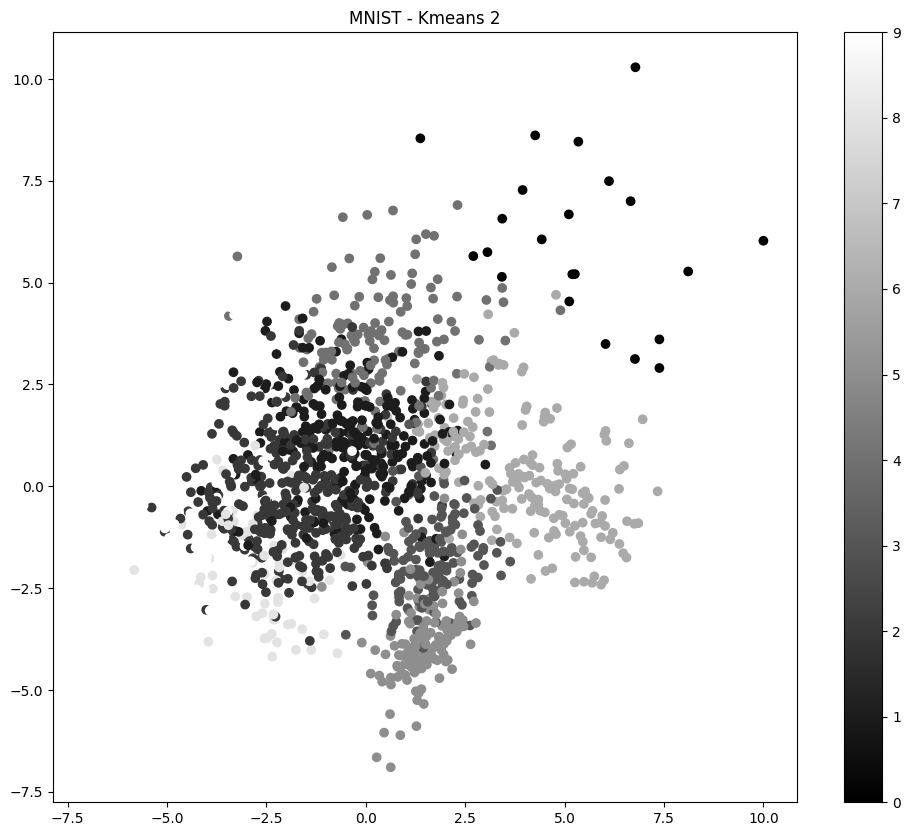

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
print(digits.data.shape)

# plt.gray()
plt.matshow(digits.images[0])
plt.show()

x = digits.data 
y = digits.target

xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.20,
                                             random_state=12,
                                             )

#Clases a detectar
np.unique(y)


# Se estandariza
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(xtrain)
pca_mnist = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled2)
X_pca_mnist = pca_mnist.transform(X_scaled2)
X_pca_mnist.shape
print("Número de componentes principales para explicar el 80% de la varianza:", pca_mnist.n_components_)

#Se grafican todos los componentes
pca_mnist = PCA(n_components=64, random_state=RANDOM_STATE).fit(X_scaled2)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_mnist.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 64)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b') #Marcamos la linea de las 21 componentes
plt.axhline(0.8, c='r') #Marcamos la linea del 80% de la varianza
plt.show();



kmeans10 = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans10.fit(X_pca_mnist)
cluster_labels62 = kmeans10.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels62)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - Kmeans 10');


kmeans2 = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans2.fit(X_pca_mnist)
cluster_labels62 = kmeans2.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=cluster_labels62)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - Kmeans 2');

## Segunda Parte (Clase 3 y 4)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [54]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [55]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


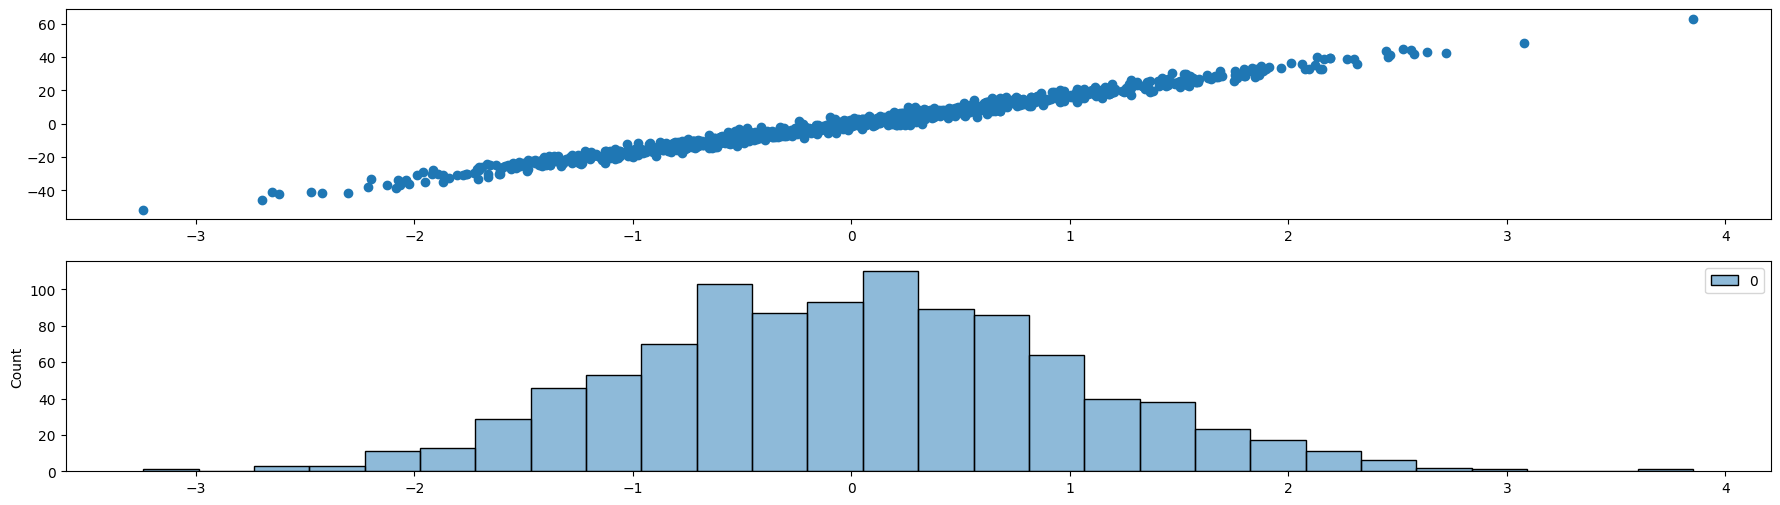

In [56]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [58]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [8]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

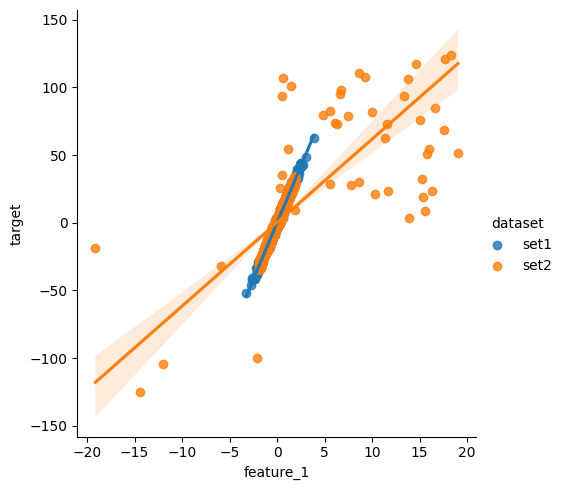

In [9]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [62]:

import numpy as np

def split(df: np.ndarray):
    """
    Divide el conjunto de datos en train, validation y test.
    
    Args:
    df: numpy array de shape (n_samples, n_features + 1), donde la última columna es el target
    
    Returns:
    X_train: numpy array de shape (n_train, n_features), features de train set
    X_val: numpy array de shape (n_val, n_features), features de validation set
    X_test: numpy array de shape (n_test, n_features), features de test set
    y_train: numpy array de shape (n_train,), target de train set
    y_val: numpy array de shape (n_val,), target de validation set
    y_test: numpy array de shape (n_test,), target de test set
    """
    
    # Definir las proporciones
    train_prop = 0.7
    val_prop = 0.2
    test_prop = 0.1
    
    # Obtener la cantidad de samples y features
    n_samples, n_features = df.shape
    
    # Obtener los índices de cada set
    train_idx = np.random.choice(n_samples, size=int(n_samples * train_prop), replace=False)
    val_test_idx = np.setdiff1d(np.arange(n_samples), train_idx)
    val_idx = np.random.choice(val_test_idx, size=int(n_samples * val_prop), replace=False)
    test_idx = np.setdiff1d(val_test_idx, val_idx)
    
    # Separar los datos en los distintos sets
    X_train, y_train = df[train_idx, :-1], df[train_idx, -1]
    X_val, y_val = df[val_idx, :-1], df[val_idx, -1]
    X_test, y_test = df[test_idx, :-1], df[test_idx, -1]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df_outlier.values)

print(f"Train: {X_train.shape}, {Y_train.shape}")
print(f"Validation: {X_val.shape}, {Y_val.shape}")
print(f"Test: {X_test.shape}, {Y_test.shape}")






Train: (700, 1), (700,)
Validation: (200, 1), (200,)
Test: (100, 1), (100,)


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

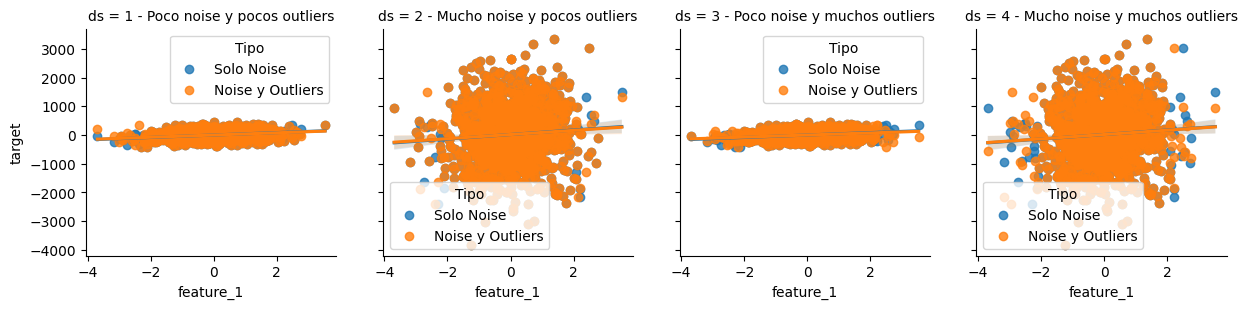

In [73]:
# Creamos un dataset de prueba


# Poco noise y pocos outliers
X, y = make_regression(n_samples = 1000,
                       n_features = 8,
                       noise = 100,
                       n_informative = 4,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df1 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df1.columns:
    if i ==  len(df1.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df1.columns = new_col
df1_with_outlier = generate_outliers(df1,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)

df1.head()

# Mucho noise y pocos outliers
X, y = make_regression(n_samples = 1000,
                          n_features = 8,
                            noise = 1000,
                            n_informative = 4,
                            random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df2 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df2.columns:
    if i ==  len(df2.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1

df2.columns = new_col
df2_with_outlier = generate_outliers(df2,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)

df2.head()

# Poco noise y muchos outliers
X, y = make_regression(n_samples = 1000,
                            n_features = 8,
                            noise = 100,
                            n_informative = 4,
                            random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df3 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df3.columns:
    if i ==  len(df3.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1

df3.columns = new_col
df3_with_outlier = generate_outliers(df3,['feature_1'], percentage = 0.95, extreme_outlier = False, two_tailed= True)

df3.head()

# Mucho noise y muchos outliers
X, y = make_regression(n_samples = 1000,
                            n_features = 8,
                            noise = 1000,
                            n_informative = 4,
                            random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df4 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df4.columns:
    if i ==  len(df4.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1

df4.columns = new_col
df4_with_outlier = generate_outliers(df4,['feature_1'], percentage = 0.95, extreme_outlier = False, two_tailed= True)

df4.head()


#Graficamos los 4 graficos juntos
df = pd.concat([df1.assign(ds = '1 - Poco noise y pocos outliers', tipo = 'Solo Noise'),
                df1_with_outlier.assign(ds = '1 - Poco noise y pocos outliers', tipo = 'Noise y Outliers'),
                df2.assign(ds = '2 - Mucho noise y pocos outliers', tipo = 'Solo Noise'),
                df2_with_outlier.assign(ds = '2 - Mucho noise y pocos outliers', tipo = 'Noise y Outliers'),
                df3.assign(ds = '3 - Poco noise y muchos outliers', tipo = 'Solo Noise'),
                df3_with_outlier.assign(ds = '3 - Poco noise y muchos outliers', tipo = 'Noise y Outliers'),
                df4.assign(ds = '4 - Mucho noise y muchos outliers', tipo = 'Solo Noise'),
                df4_with_outlier.assign(ds = '4 - Mucho noise y muchos outliers', tipo = 'Noise y Outliers')])

g = sns.FacetGrid(df, col='ds')

for ds, ax in g.axes_dict.items():
    sns.regplot(data=df[(df['ds'] == ds) & (df['tipo'] == 'Solo Noise')], x='feature_1', y='target', ax=ax, label='Solo Noise')
    sns.regplot(data=df[(df['ds'] == ds) & (df['tipo'] == 'Noise y Outliers')], x='feature_1', y='target', ax=ax, label='Noise y Outliers')
    ax.legend(title='Tipo')

g.add_legend()

### LinearRegression

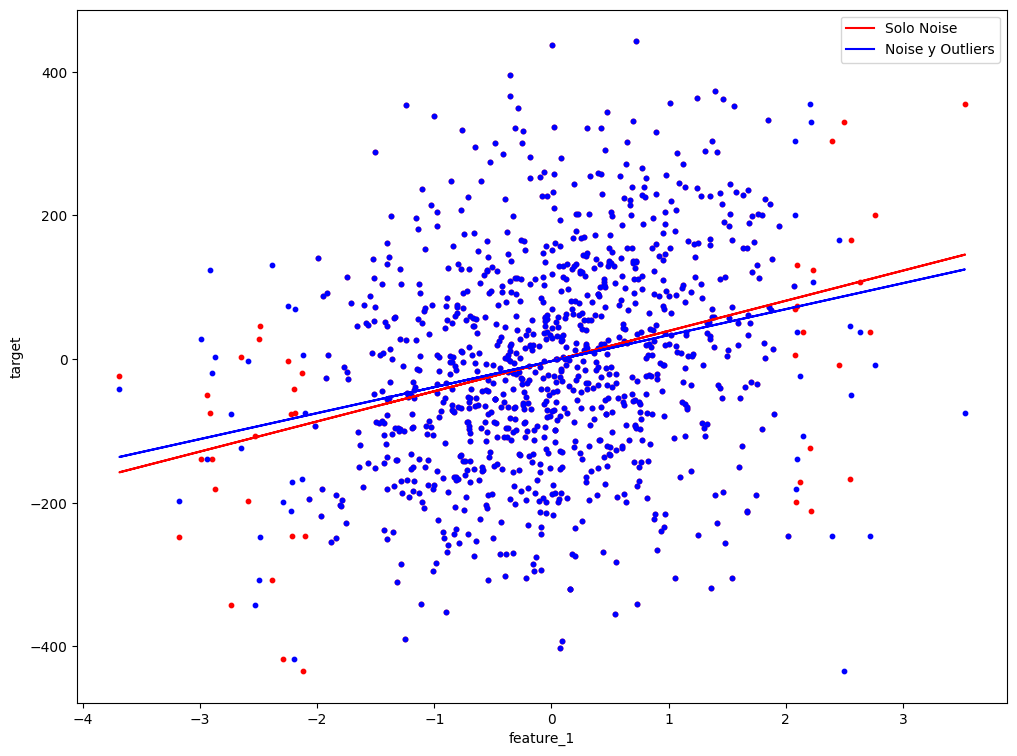


El error (mse) es: 21187.71985167696


In [74]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

#LinearRegression con DS3
lr = LinearRegression(fit_intercept=True)
lrwo = LinearRegression(fit_intercept=True)

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((1000,1))
y1 = np.array(y1).reshape((1000,1))

xwo1 = np.array(xwo1).reshape((1000,1))
ywo1 = np.array(ywo1).reshape((1000,1))

lr.fit(x1,y1)
lrwo.fit(xwo1,ywo1)

#Prediccion
lr_y_hat = lr.predict(x1)
lrwo_y_hat = lrwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, lr_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, lrwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Error del modelo 
mse_lineal = mean_squared_error(
                y_true  = ywo1,
                y_pred  = lrwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_lineal}")

### HuberRegressor

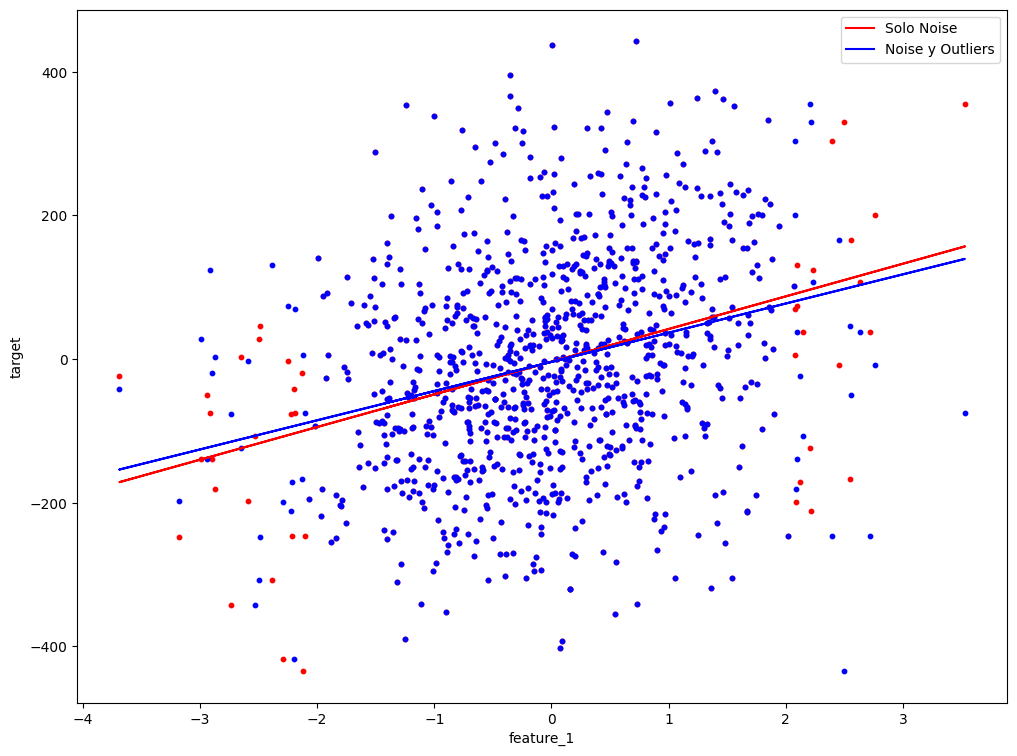


El error (mse) es: 21209.236109835663


In [75]:
#HuberRegressor con DS3
hr = HuberRegressor(fit_intercept=True)
hrwo = HuberRegressor(fit_intercept=True)

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((1000,1))
y1 = np.array(y1).reshape((1000,1))

xwo1 = np.array(xwo1).reshape((1000,1))
ywo1 = np.array(ywo1).reshape((1000,1))

y1 = np.array(y1).ravel()
ywo1 = np.array(ywo1).ravel()

hr.fit(x1,y1)
hrwo.fit(xwo1,ywo1)

#Prediccion
hr_y_hat = hr.predict(x1)
hrwo_y_hat = hrwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, hr_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, hrwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Error del modelo 
mse_huber = mean_squared_error(
                y_true  = ywo1,
                y_pred  = hrwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_huber}")

### ElasticNetCV

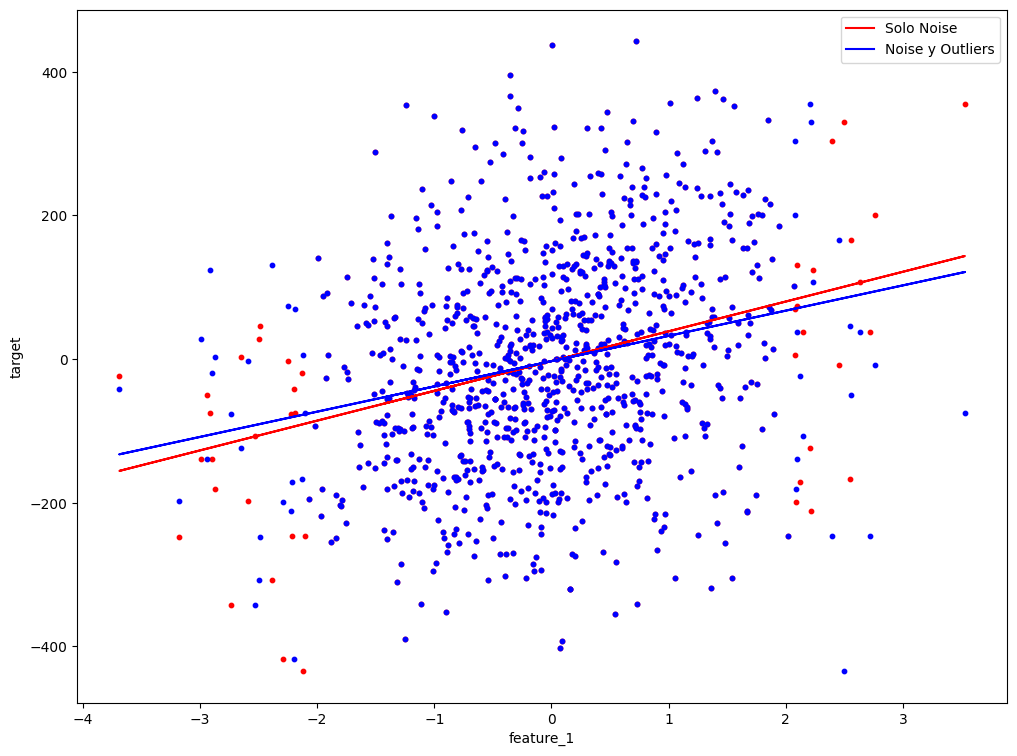

Mejor valor de alpha  encontrado: 0.029331662783900425
Mejor valor de l1_ratio (Porcentaje de LassoRegression frente a RidgeRegression) encontrado: 0.0001

El error (mse) es: 21188.76309705946


In [76]:
#ElasticNetCV con DS3
en = ElasticNetCV(
            l1_ratio        = [0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-5, 10, 200),
            # normalize       = True,
            cv              = 10,
            fit_intercept=True
         )

enwo = ElasticNetCV(
            l1_ratio        = [0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-5, 10, 200),
            # normalize       = True,
            cv              = 10,
            fit_intercept=True
         )

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((1000,1))
y1 = np.array(y1).reshape((1000,1))

xwo1 = np.array(xwo1).reshape((1000,1))
ywo1 = np.array(ywo1).reshape((1000,1))

y1 = np.array(y1).ravel()
ywo1 = np.array(ywo1).ravel()

en.fit(x1,y1)
enwo.fit(xwo1,ywo1)

#Prediccion
en_y_hat = en.predict(x1)
enwo_y_hat = enwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, en_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, enwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Mejor valor alpha y l1_ratio_ encontrado
print(f"Mejor valor de alpha  encontrado: {enwo.alpha_}")
print(f"Mejor valor de l1_ratio (Porcentaje de LassoRegression frente a RidgeRegression) encontrado: {enwo.l1_ratio_}")

# Error del modelo 
mse_elastic = mean_squared_error(
                y_true  = ywo1,
                y_pred  = enwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_elastic}")

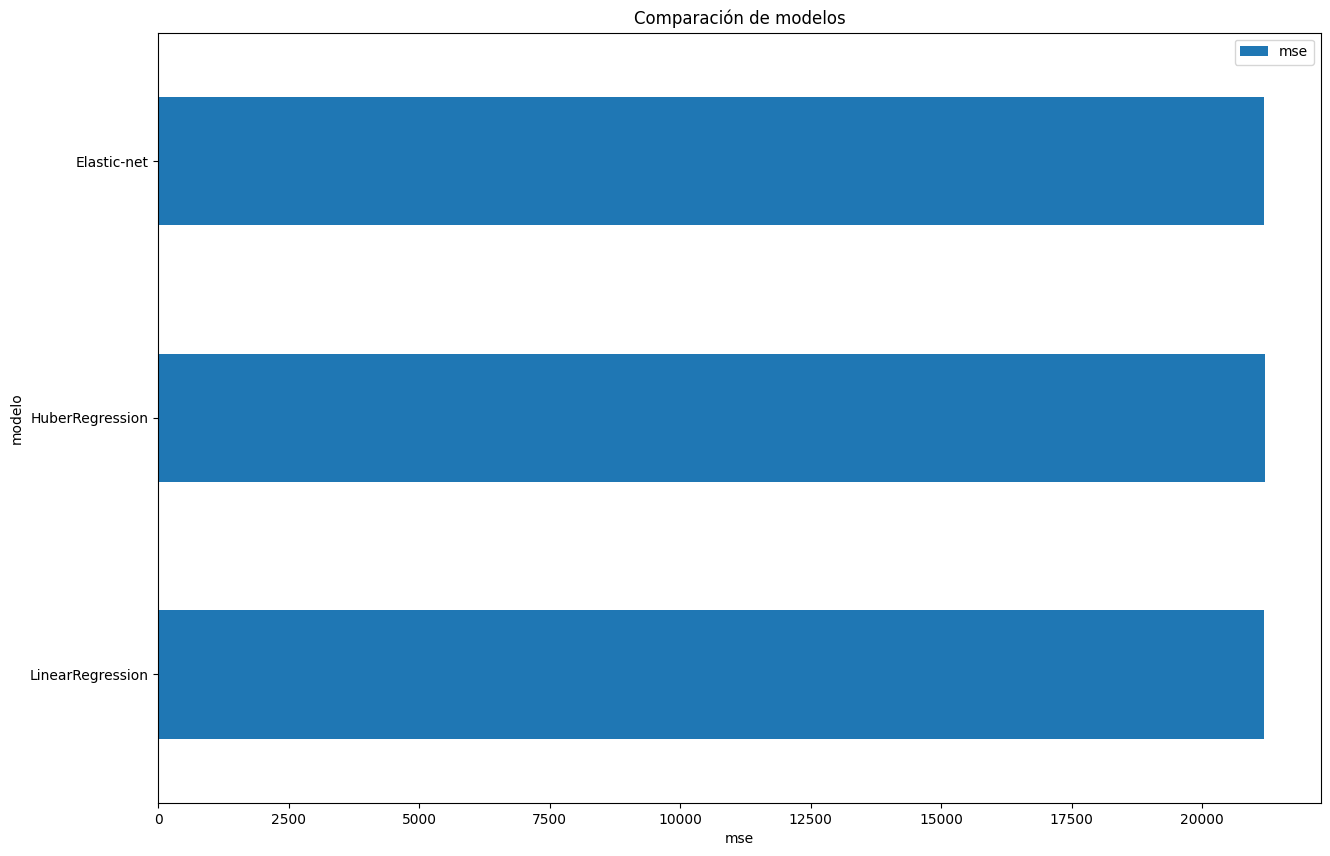

In [77]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'HuberRegression', 'Elastic-net'],
                    'mse': [mse_lineal, mse_huber, mse_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`